# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
!pip install citipy

In [6]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

627


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:

# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness %"] = ""
weather_df["Humidity %"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness %"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity %"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | provideniya.
Processing Record 1  of Set 1 | niamey.
Processing Record 2  of Set 1 | asfi.
Processing Record 3  of Set 1 | new norfolk.
Processing Record 4  of Set 1 | isangel.
Processing Record 5  of Set 1 | khatanga.
Processing Record 6  of Set 1 | aden.
Processing Record 7  of Set 1 | barrow.
Processing Record 8  of Set 1 | astaneh-ye ashrafiyeh.
Processing Record 9  of Set 1 | komsomolskiy.
Processing Record 10  of Set 1 | albany.
Processing Record 11  of Set 1 | mouzakion.
City not found...skipping mouzakion.
Processing Record 12  of Set 1 | belfast.
Processing Record 13  of Set 1 | tebingtinggi.
Processing Record 14  of Set 1 | kathmandu.
Processing Record 15  of Set 1 | tabuk.
Processing Record 16  of Set 1 | hobart.
Processing Record 17  of Set 1 | cabo san lucas.
Processing Record 18  of Set 1 | lubango.
Processing Record 19  of Set 1 | cidreira.
Processing Record 20  of Set 1 | kapaa.
Proce

Processing Record 23  of Set 4 | los llanos de aridane.
Processing Record 24  of Set 4 | nowogard.
Processing Record 25  of Set 4 | haines junction.
Processing Record 26  of Set 4 | acapulco.
Processing Record 27  of Set 4 | bayanday.
Processing Record 28  of Set 4 | pervomayskiy.
Processing Record 29  of Set 4 | makakilo city.
Processing Record 30  of Set 4 | kavieng.
Processing Record 31  of Set 4 | whitehorse.
Processing Record 32  of Set 4 | goderich.
Processing Record 33  of Set 4 | dolbeau.
City not found...skipping dolbeau.
Processing Record 34  of Set 4 | uroteppa.
City not found...skipping uroteppa.
Processing Record 35  of Set 4 | palasa.
Processing Record 36  of Set 4 | prado.
Processing Record 37  of Set 4 | tsihombe.
City not found...skipping tsihombe.
Processing Record 38  of Set 4 | fortuna.
Processing Record 39  of Set 4 | ostrovnoy.
Processing Record 40  of Set 4 | kaitangata.
Processing Record 41  of Set 4 | dingle.
Processing Record 42  of Set 4 | gouyave.
Processing

Processing Record 48  of Set 7 | aloleng.
Processing Record 49  of Set 7 | mpanda.
Processing Record 0  of Set 8 | waipawa.
Processing Record 1  of Set 8 | vathi.
Processing Record 2  of Set 8 | ostersund.
Processing Record 3  of Set 8 | huangnihe.
Processing Record 4  of Set 8 | meadow lake.
Processing Record 5  of Set 8 | ritchie.
Processing Record 6  of Set 8 | chuy.
Processing Record 7  of Set 8 | carauari.
Processing Record 8  of Set 8 | port elizabeth.
Processing Record 9  of Set 8 | severo-kurilsk.
Processing Record 10  of Set 8 | acarau.
Processing Record 11  of Set 8 | deep river.
Processing Record 12  of Set 8 | nanortalik.
Processing Record 13  of Set 8 | gannan.
Processing Record 14  of Set 8 | sorkjosen.
Processing Record 15  of Set 8 | itoman.
Processing Record 16  of Set 8 | dhidhdhoo.
Processing Record 17  of Set 8 | thomastown.
Processing Record 18  of Set 8 | broken hill.
Processing Record 19  of Set 8 | det udom.
Processing Record 20  of Set 8 | ruteng.
Processing Re

Processing Record 31  of Set 11 | jacareacanga.
Processing Record 32  of Set 11 | florianopolis.
Processing Record 33  of Set 11 | cayenne.
Processing Record 34  of Set 11 | ushtobe.
Processing Record 35  of Set 11 | mezen.
Processing Record 36  of Set 11 | kieta.
Processing Record 37  of Set 11 | olafsvik.
Processing Record 38  of Set 11 | roald.
Processing Record 39  of Set 11 | novikovo.
Processing Record 40  of Set 11 | karlstad.
Processing Record 41  of Set 11 | chilliwack.
Processing Record 42  of Set 11 | houma.
Processing Record 43  of Set 11 | chumikan.
Processing Record 44  of Set 11 | huarmey.
Processing Record 45  of Set 11 | katima mulilo.
Processing Record 46  of Set 11 | chara.
Processing Record 47  of Set 11 | tumannyy.
City not found...skipping tumannyy.
Processing Record 48  of Set 11 | gagino.
Processing Record 49  of Set 11 | oistins.
Processing Record 0  of Set 12 | berehomet.
Processing Record 1  of Set 12 | sakaiminato.
Processing Record 2  of Set 12 | waddan.
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Data Count
weather_df.count()

City                627
Country             627
Date                627
Latitude            627
Longitude           627
Cloudiness %        627
Humidity %          627
Max Temp (F)        627
Wind Speed (mph)    627
dtype: int64

In [45]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness %,Humidity %,Max Temp (F),Wind Speed (mph)
0,provideniya,RU,2021-09-26 18:03:03,64.3833,-173.3,40,75,37.778,7
1,niamey,NE,2021-09-26 18:00:14,13.5137,2.1098,59,32,91.778,3.28
2,asfi,MA,2021-09-26 18:02:25,32.2994,-9.2372,83,78,70.628,6.21
3,new norfolk,AU,2021-09-26 18:00:58,-42.7826,147.0587,24,76,48.02,0.45
4,isangel,VU,2021-09-26 18:03:06,-19.55,169.2667,53,63,75.416,4.18


In [46]:

# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness %"]).astype(float)
pd.to_numeric(weather_df["Humidity %"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

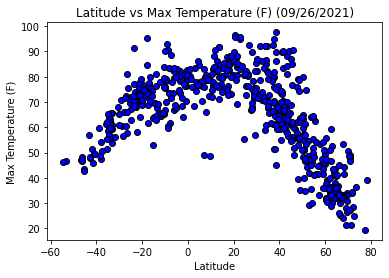

In [47]:
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 1.0)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
date = time.strftime("%m/%d/%Y")
plt.title(f"Latitude vs Max Temperature (F) ({date})")
plt.savefig("./output_data/LatVsMaxTemp.png")

## Latitude vs. Humidity Plot

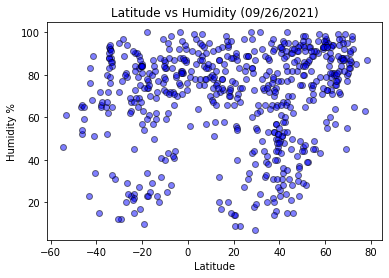

In [48]:
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity %"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
date = time.strftime("%m/%d/%Y")
plt.title(f"Latitude vs Humidity ({date})")
plt.savefig("./output_data/LatVsHumidity.png")

## Latitude vs. Cloudiness Plot

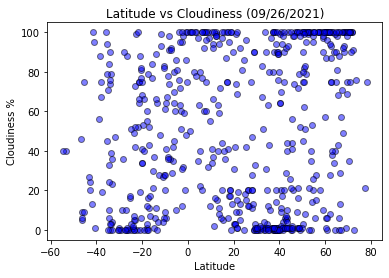

In [49]:
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness %"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
date = time.strftime("%m/%d/%Y")
plt.title(f"Latitude vs Cloudiness ({date})")
plt.savefig("./output_data/LatVsCloudiness.png")

## Latitude vs. Wind Speed Plot

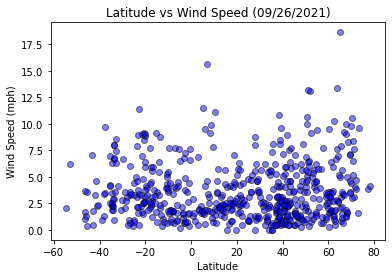

In [50]:
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
date = time.strftime("%m/%d/%Y")
plt.title(f"Latitude vs Wind Speed ({date})")
plt.savefig("./output_data/LatVsWindSpeed.png")

Linear Regression

In [34]:
# Northern and Southern Hemisphere Dataframes
northern_hem_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_hem_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.79x + 95.0
The r-squared is: -0.8032321478494683


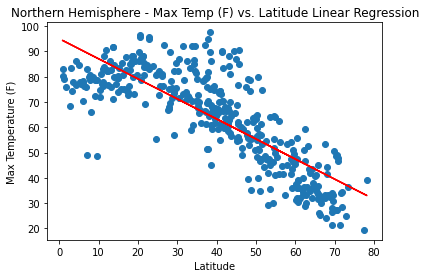

In [51]:
x_values = pd.to_numeric(northern_hem_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.63x + 81.55
The r-squared is: 0.750510818284137


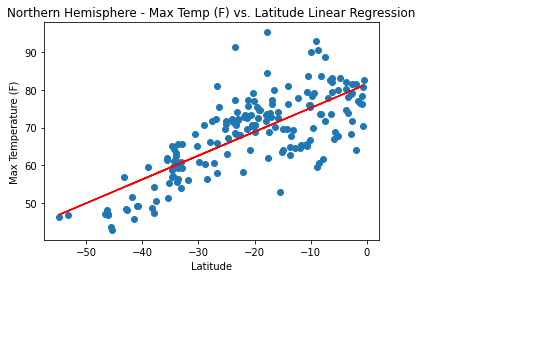

In [52]:
x_values = pd.to_numeric(southern_hem_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.15x + 64.91
The r-squared is: 0.12245844593949541


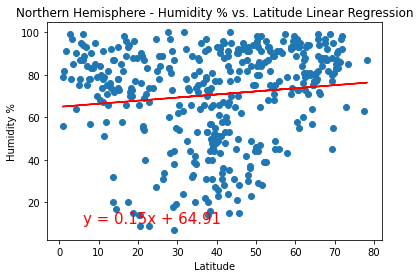

In [53]:
x_values = pd.to_numeric(northern_hem_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem_df['Humidity %']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere - Humidity % vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.28x + 73.53
The r-squared is: 0.15634516785398606


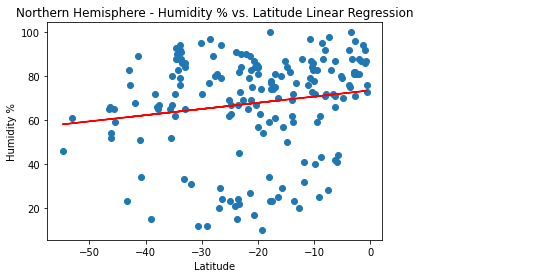

In [54]:
x_values = pd.to_numeric(southern_hem_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem_df['Humidity %']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere - Humidity % vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.26x + 41.75
The r-squared is: 0.120768407962958


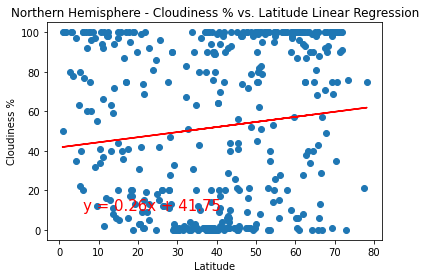

In [55]:
x_values = pd.to_numeric(northern_hem_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem_df['Cloudiness %']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.65x + 56.76
The r-squared is: 0.2436563199506501


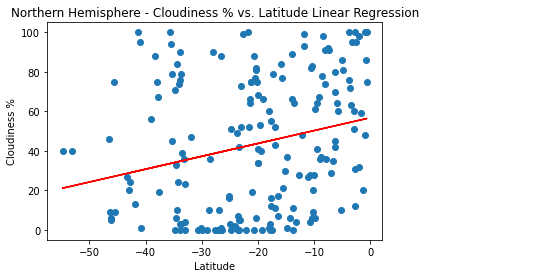

In [56]:
x_values = pd.to_numeric(southern_hem_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem_df['Cloudiness %']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 2.62
The r-squared is: 0.15862316593632667


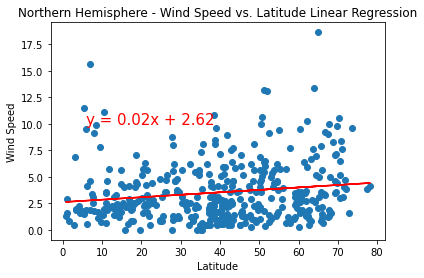

In [57]:
x_values = pd.to_numeric(northern_hem_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.01x + 3.4
The r-squared is: -0.054452407563502704


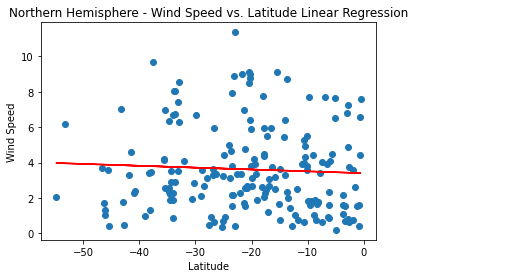

In [58]:
x_values = pd.to_numeric(southern_hem_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()